In [97]:
from glob import glob
import pandas as pd
import numpy as np
from scipy import stats  
import matplotlib.pyplot as plt
import japanize_matplotlib

In [3]:
files = glob("../csv/例題_データアナリティクス基礎/*")
for i, f in enumerate(files):
    print(i, f)


0 ../csv/例題_データアナリティクス基礎\例題10_自由記述データ&形態素解析データ.xlsx
1 ../csv/例題_データアナリティクス基礎\例題11_乱数で発生させた分布の基本統計量.xlsx
2 ../csv/例題_データアナリティクス基礎\例題1_自転車データ.xlsx
3 ../csv/例題_データアナリティクス基礎\例題2_顧客ID付き食品購入データ.xlsx
4 ../csv/例題_データアナリティクス基礎\例題3_テレビ視聴アンケートデータ.xlsx
5 ../csv/例題_データアナリティクス基礎\例題4_5つの地域の事業所数.xlsx
6 ../csv/例題_データアナリティクス基礎\例題5_関東地方の人口データ.xlsx
7 ../csv/例題_データアナリティクス基礎\例題7_異なる授業形態による成績データ.xlsx
8 ../csv/例題_データアナリティクス基礎\例題8_遊園地テーマパーク入場者数.xlsx
9 ../csv/例題_データアナリティクス基礎\例題9_店舗別販売額.xlsx


In [4]:
office_data = pd.read_excel(files[5])
print(office_data.columns)
office_data.columns = ['area', 'person', 'office', 'community', 'library',]
office_data.head()

Index(['地域', '転入者数（人）', '事業所数', '公民館数', '図書館数'], dtype='object')


,area,person,office,community,library
0,A,3753,7453,0,4
1,A,906,2035,19,1
2,A,698,1284,7,1
3,A,920,1778,9,1
4,A,818,1989,25,1


In [5]:
office_data.describe()

,person,office,community,library
count,44.000000,44.000000,44.000000,44.000000
mean,2020.318182,2791.704545,6.068182,1.454545
std,2450.040387,2560.774497,5.923535,1.354657
min,148.000000,379.000000,0.000000,0.000000
25%,674.500000,1322.500000,1.000000,1.000000
50%,1296.500000,1983.500000,4.000000,1.000000
75%,2256.500000,3115.000000,9.000000,2.000000
max,13016.000000,13790.000000,25.000000,7.000000


In [6]:
bins = np.array([0, 1000, 2000, 3000, 4000, 5000, 10000])
freq = office_data["office"].value_counts(bins=bins, sort=False)
hist_data = pd.DataFrame(
    {
        "階級値": (bins[:-1] + bins[1:]) / 2,
        "度数": freq.values,
        "相対度数": freq.values / freq.sum(),
        "累積度数": freq.values.cumsum(),
        "相対累積度数": freq.values.cumsum() / freq.sum(),
    },
    index=freq.index,
)
hist_data

,階級値,度数,相対度数,累積度数,相対累積度数
"(-0.001, 1000.0]",500.0,5,0.116279,5,0.116279
"(1000.0, 2000.0]",1500.0,18,0.418605,23,0.534884
"(2000.0, 3000.0]",2500.0,9,0.209302,32,0.744186
"(3000.0, 4000.0]",3500.0,4,0.093023,36,0.837209
"(4000.0, 5000.0]",4500.0,2,0.046512,38,0.883721
"(5000.0, 10000.0]",7500.0,5,0.116279,43,1.000000


<Axes: xlabel='階級値'>

<Figure size 1000x300 with 0 Axes>

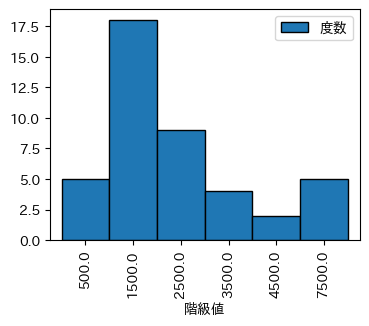

In [96]:
plt.figure(figsize=(10, 3))
hist_data.plot.bar(x='階級値', y='度数', width=1, ec='k', lw=1, figsize=(4, 3))


<Axes: >

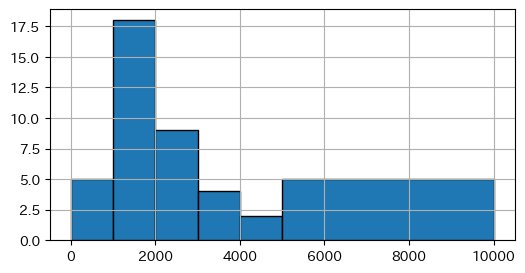

In [8]:
plt.figure(figsize=(6, 3))
office_data['office'].hist(bins=bins, ec='k', lw=1)

In [15]:
office_data.groupby('area').mean().style.format('{:.01f}')

,person,office,community,library
area,,,,
A,1227.5,2604.8,10.3,1.3
B,2525.1,3473.0,3.3,2.1
C,2812.8,2676.1,5.2,1.4
D,1207.8,2674.6,6.3,1.0
E,1469.2,2347.6,7.8,1.4


In [21]:
office_data['person'][office_data['area'] == 'A'].max() - office_data['person'][office_data['area'] == 'A'].min()

3483

In [43]:
describes = office_data.pivot_table(index='area', values='office', aggfunc='describe')
describes

,25%,50%,75%,count,max,mean,min,std
area,,,,,,,,
A,1407.50,1883.5,2023.50,6.0,7453.0,2604.833333,1090.0,2405.479363
B,1274.00,1884.0,3584.00,9.0,13790.0,3473.000000,729.0,4169.207269
C,1500.75,2012.5,3115.00,14.0,8718.0,2676.071429,379.0,2389.446072
D,1607.00,2325.5,2983.25,10.0,6265.0,2674.600000,471.0,1757.788649
E,1686.00,1805.0,2458.00,5.0,4462.0,2347.600000,1327.0,1250.662744


In [88]:
describes['75%'] - describes['25%']

area
A     616.00
B    2310.00
C    1614.25
D    1376.25
E     772.00
dtype: float64

箱ひげ図

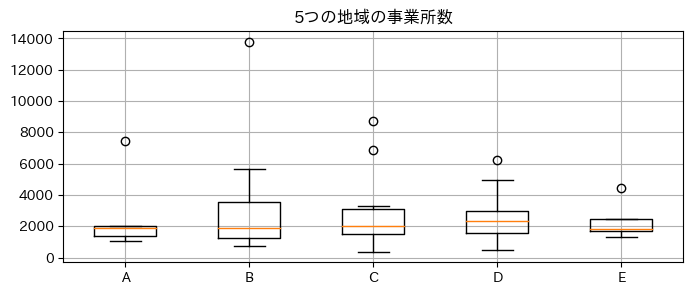

In [87]:
plt.figure(figsize=(8, 3))
labels = office_data['area'].unique()
data = [np.array(office_data.query(f'area == "{a}"')['office']) for a in labels]
plt.boxplot(data, labels=labels)
plt.title('5つの地域の事業所数')
plt.grid()
plt.show()

変動係数

In [94]:
describes['std'] / describes['mean']

area
A    0.923468
B    1.200463
C    0.892893
D    0.657216
E    0.532741
dtype: float64

偏差の計算

In [134]:
for i in range(7):
    print(f'{i} sigma: {(1-stats.norm.cdf(i))*2}')

0 sigma: 1.0
1 sigma: 0.31731050786291415
2 sigma: 0.04550026389635842
3 sigma: 0.002699796063260207
4 sigma: 6.334248366623996e-05
5 sigma: 5.733031438470704e-07
6 sigma: 1.973175400848959e-09


正規分布

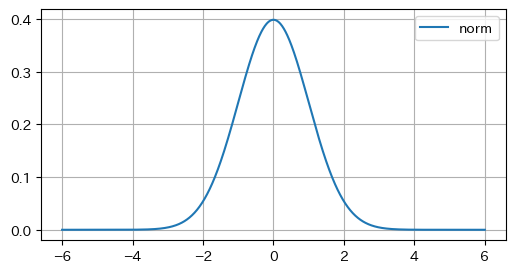

In [148]:
plt.figure(figsize=(6, 3))
x = np.linspace(-6, 6, 1000)
y = stats.norm.pdf(x)
plt.plot(x, y, label='norm')
plt.grid()
plt.legend()
plt.show()

偏差値の計算

In [166]:
test_result = np.array([100, 70, 80, 80, 100])
deviation = test_result - test_result.mean()
std_score = deviation / test_result.std(ddof=0)
hensachi = std_score * 10 + 50
df_hensachi = pd.DataFrame(
    [test_result, deviation, std_score, hensachi],
    ).T
df_hensachi.columns = ['得点', '偏差', '標準得点', '偏差値']
df_hensachi.style.format('{:.02f}')

,得点,偏差,標準得点,偏差値
0,100.00,14.00,1.17,61.67
1,70.00,-16.00,-1.33,36.67
2,80.00,-6.00,-0.50,45.00
3,80.00,-6.00,-0.50,45.00
4,100.00,14.00,1.17,61.67
